

# Project: Investigate a Dataset (Analysing TMDB Movie Data )

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **TMDB Movie Data**: This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.
>
> **Questions:**
>
> * Which movie has the highest Profit? Which movie has the lowest Profit?
>
> * How many documentary movies there? is investing in it waste money?
>
> * which director, cast, genres are in great demand?
>
> * Movies profits investigation increased or decreased every year? Is it a good investment?

In [256]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import re
import collections

<a id='wrangling'></a>
## Data Wrangling

 Data Cleaning (Replace this with more specific notes!)
> * Remove duplicate Data
> * Some columns we didnot need them [id,imdb_id,popularity]
> * Change data type of release_date  to be date time
> * Change data type of budget_adj and revenue_adj to be Integer as no need for fractions in millions no.
> * Although budget,revenue & budget_adj,revenue_adj has the same information but i will keep both of them as
we need budget,revenue as basic data and need budget_adj,revenue_adj for statistics purboses .
> * Drop all Rows whitch has budget_adj,revenue_adj less than 1000$  as the data seems to be wrong .
> * Some movies run time = 0 but we will do nothing as this column will be removed with rows with 0 budget .

In [ ]:
# Load tmdb-movies into pandas 
tmdb_df=pd.read_csv("tmdb-movies.csv")
tmdb_df.head()

In [ ]:
#review columns 
tmdb_df.info()

In [258]:
# check is there any duplication
tmdb_df.duplicated().value_counts()

False    35
dtype: int64

In [257]:
# show statistics of whole data
tmdb_df.describe()

,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
count,3.500000e+01,3.500000e+01,35.000000,35.000000,35.000000,35.000000,3.500000e+01,3.500000e+01,3.500000e+01
mean,4.852976e+06,2.252440e+07,101.428571,68.628571,6.660000,2004.742857,5.379701e+06,2.480617e+07,1.942646e+07
std,5.725120e+06,3.229610e+07,18.129089,72.103718,0.861667,6.779480,6.460385e+06,3.532337e+07,3.207793e+07
min,6.000000e+03,6.000000e+03,71.000000,10.000000,4.500000,1984.000000,6.310000e+03,6.310000e+03,-3.620652e+06
25%,1.000000e+06,1.433030e+06,90.000000,19.000000,6.400000,2003.500000,1.066668e+06,1.622252e+06,8.756550e+04
50%,2.500000e+06,7.830611e+06,95.000000,27.000000,6.700000,2006.000000,3.000000e+06,1.045097e+07,5.473353e+06
75%,7.500000e+06,3.065102e+07,106.000000,96.000000,7.200000,2010.000000,7.825627e+06,3.140185e+07,2.451620e+07
max,2.000000e+07,1.191145e+08,171.000000,295.000000,8.400000,2012.000000,2.716921e+07,1.375112e+08,1.305845e+08



### Data Cleaning 
> * Remove duplicate Data
> * Some columns we didnot need them [id,imdb_id,popularity]
> * Change data type of release_date  to be date time
> * Change data type of budget_adj and revenue_adj to be Integer as no need for fractions in millions no.
> * Although budget,revenue & budget_adj,revenue_adj has the same information but i will keep both of them as
we need budget,revenue as basic data and need budget_adj,revenue_adj for statistics purboses .
> * Drop all Rows whitch has budget_adj,revenue_adj less than 100$  as the data seems to be wrong .
> * Some movies run time = 0 but we will do nothing as this column will be removed with rows with 0 budget .

In [ ]:
# Make copy of data to clean
tmdb_df_cleaned=tmdb_df.copy()

In [ ]:
#Drop duplicate values
tmdb_df_cleaned.drop_duplicates(inplace=True)

In [ ]:
#drop columns that i will not use and contain no important data  [id,imdb_id,popularity] 
tmdb_df_cleaned.drop(columns=['id','imdb_id','popularity'],inplace=True)

In [ ]:
#test the drop operation 
tmdb_df_cleaned.head(2)

In [ ]:
#Change Data type of  release_date to date time
tmdb_df_cleaned['release_date']=pd.to_datetime(tmdb_df_cleaned['release_date'])
tmdb_df_cleaned.head(2)

In [ ]:
#test Data type of  release_date
tmdb_df_cleaned.info()

In [ ]:
#Change data type of budget_adj and revenue_adj to be Integer as no need for fractions in millions or billions .
col=['budget_adj','revenue_adj']
tmdb_df_cleaned[col]=tmdb_df_cleaned[col].astype(int)
tmdb_df_cleaned.head(2)

In [ ]:
#test Change data type of budget_adj and revenue_adj
tmdb_df_cleaned.info()

In [ ]:
# drop all data >100$ in budget_adj and revenue_adj
tmdb_df_cleaned=tmdb_df_cleaned[(tmdb_df_cleaned['budget_adj']>100) & (tmdb_df_cleaned['revenue_adj']>100)]
tmdb_df_cleaned.head(2)

In [ ]:
#test the drop operation 
tmdb_df_cleaned.info()

<a id='eda'></a>
## Exploratory Data Analysis

> **Questions:**
>
> * Which movie has the highest Profit? Which movie has the lowest Profit?
>
> * How many documentary movies there? is investing in it waste money?
>
> * which director, cast, genres are in great demand?
>
> * Movies profits investigation increased or decreased every year? Is it a good investment?

### Research Question 1 (Which movie has the highest Profit? Which movie has the lowest Profit?)

In [ ]:
# calculate the profit for all  movies
tmdb_df_cleaned['profit']=tmdb_df_cleaned['revenue_adj']-tmdb_df_cleaned['budget_adj']

In [ ]:
# movie with highest revenue
tmdb_df_cleaned[tmdb_df_cleaned['profit']==tmdb_df_cleaned['profit'].max()]

In [226]:
tmdb_df_cleaned['profit'].describe()

count    3.815000e+03
mean     9.126899e+07
std      1.793574e+08
min     -4.139124e+08
25%     -1.493570e+06
50%      2.805089e+07
75%      1.079842e+08
max      1.878643e+09
Name: profit, dtype: float64

In [ ]:
# movie with lowest revenue
tmdb_df_cleaned[tmdb_df_cleaned['profit']==tmdb_df_cleaned['profit'].min()]

In [ ]:
tmdb_df_cleaned['profit'].nlargest(10)

In [ ]:
tmdb_top_10_revenue=tmdb_df_cleaned[lambda x :x['profit'] >= 1246626367]
tmdb_top_10_revenue.head(2)

In [ ]:
tmdb_df_cleaned['profit'].nsmallest(10)

In [ ]:
tmdb_min_10_revenue=tmdb_df_cleaned[lambda x :x['profit'] <= -91445050]
tmdb_min_10_revenue

In [ ]:
#Function to plot relation between x , y
def plot_relation_rate(stage,xlabel,ylabel,message):
    type(stage)
    stage=stage.sort_values()
    plt.figure(figsize=(14, 9))
    plt.barh(stage.index,stage.array)
    plt.xlabel(xlabel, fontsize = 14)
    plt.title('relation between {} and {} {}'.format(xlabel,ylabel,message), fontsize = 16)
    #plt.gca().invert_yaxis()
    plt.show();

In [ ]:
top_stage=tmdb_top_10_revenue.groupby(['original_title'])['profit'].sum()
top_stage.astype('int64')
plot_relation_rate(top_stage,'profit','Movie',"top 10")

In [ ]:
top_stage=tmdb_top_10_revenue.groupby(['director'])['profit'].sum()
top_stage.astype('int64')
plot_relation_rate(top_stage,'profit','Director',"TOP 10")

In [ ]:
top_stage=tmdb_min_10_revenue.groupby(['director'])['profit'].sum()
top_stage.astype('int64')
plot_relation_rate(top_stage,'profit','Director','Lowest 10')

In [ ]:
top_stage=tmdb_min_10_revenue.groupby(['original_title'])['profit'].sum()
top_stage.astype('int64')
plot_relation_rate(top_stage,'profit','Movie',"Lowest 10")

### Research Question 2  (How many documentary movies there? is investing in it waste money?)

In [ ]:
# How many documentry movie What about those movies profit and compare with all movies profit
tmdb_df=tmdb_df_cleaned[tmdb_df_cleaned['genres'].str.contains('Documentary')]

In [ ]:
# there is about 35 documentary movie and the relation between profit and movies
top_stage=tmdb_df.groupby(['original_title'])['profit'].sum()
top_stage.astype('int64')
plot_relation_rate(top_stage,'Profit','Documentry',"Movie")

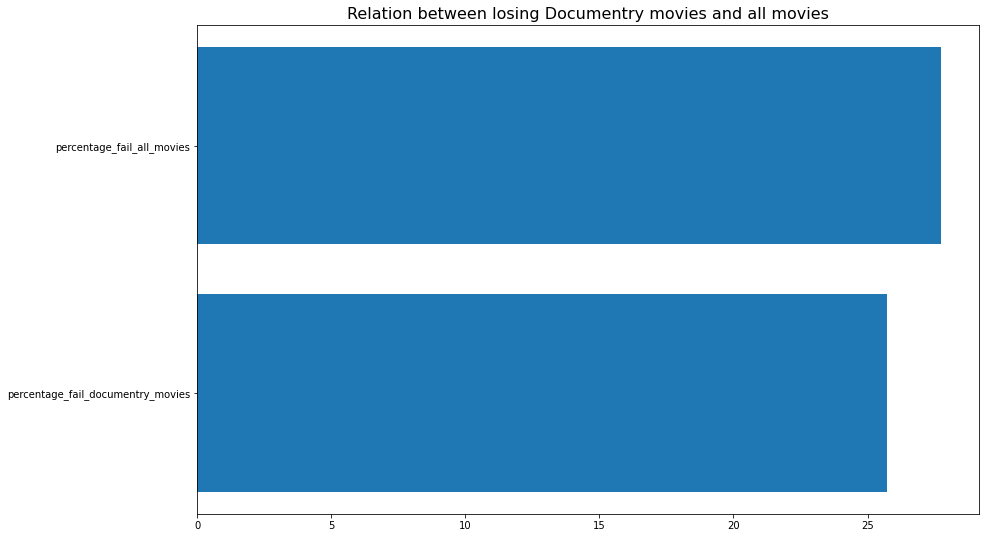

In [253]:
#compare the precentage of losing movies budget>revenue  in both all movies and documentry movies
fail_d_movies=tmdb_df[tmdb_df['profit']<=0].count().max()
all_d_movies=tmdb_df['profit'].count().max()
percentage_fail_documentry_movies=(fail_d_movies/all_d_movies)*100
percentage_fail_all_movies=((tmdb_df_cleaned[tmdb_df_cleaned['profit']<=0].count().max())/(tmdb_df_cleaned['profit'].count().max()))*100
plt.figure(figsize=(14, 9))
plt.barh(['percentage_fail_documentry_movies','percentage_fail_all_movies'],[percentage_fail_documentry_movies,percentage_fail_all_movies])
plt.title('Relation between losing Documentry movies and all movies', fontsize = 16)
plt.show();

In [ ]:
tmdb_df_cleaned.to_csv("cleaned_tmdb.csv",index=0)

### Research Question 3  (which director, cast, genres are in great demand?)

In [254]:
#Function to plot relation between x , y
def plot_relation_rate_dic(dic,xlabel,ylabel,message):
    type(dic)
    dic=dict(sorted(dic.items(), key=lambda item: item[1]))
    plt.figure(figsize=(22, 10), dpi = 130)
    plt.xlabel(xlabel ,fontsize = 14)
    plt.ylabel(ylabel, fontsize = 14)
    plt.bar(dic.keys(),dic.values())
    plt.title('relation between {} and {} {}'.format(xlabel,ylabel,message), fontsize = 16)
    #plt.gca().invert_yaxis()
    plt.show();

In [247]:
#function to count each one and his occurance
def data_occurance_rate_due_profit(data):
    temparr={}
    temp=data
    for item in temp:
        try:
            data_temp=re.search(r'[\w\W]+',item).group().split('|')
           # print(data_temp)
            for item in data_temp:
                if(item in temparr):
                    temparr[item]=temparr[item]+1
                else:
                    temparr[item]=1
        except :
            continue
    return temparr

In [248]:
#Get most wanted movies geners and sort them with largest
geners=data_occurance_rate_due_profit(tmdb_df_cleaned['genres'])
dict(sorted(geners.items(), key=lambda item: item[1], reverse=True))

{'Drama': 1742,
 'Comedy': 1340,
 'Thriller': 1192,
 'Action': 1074,
 'Adventure': 741,
 'Romance': 656,
 'Crime': 649,
 'Science Fiction': 514,
 'Horror': 457,
 'Family': 420,
 'Fantasy': 390,
 'Mystery': 343,
 'Animation': 199,
 'Music': 133,
 'History': 128,
 'War': 119,
 'Western': 52,
 'Documentary': 35,
 'Foreign': 13,
 'TV Movie': 1}

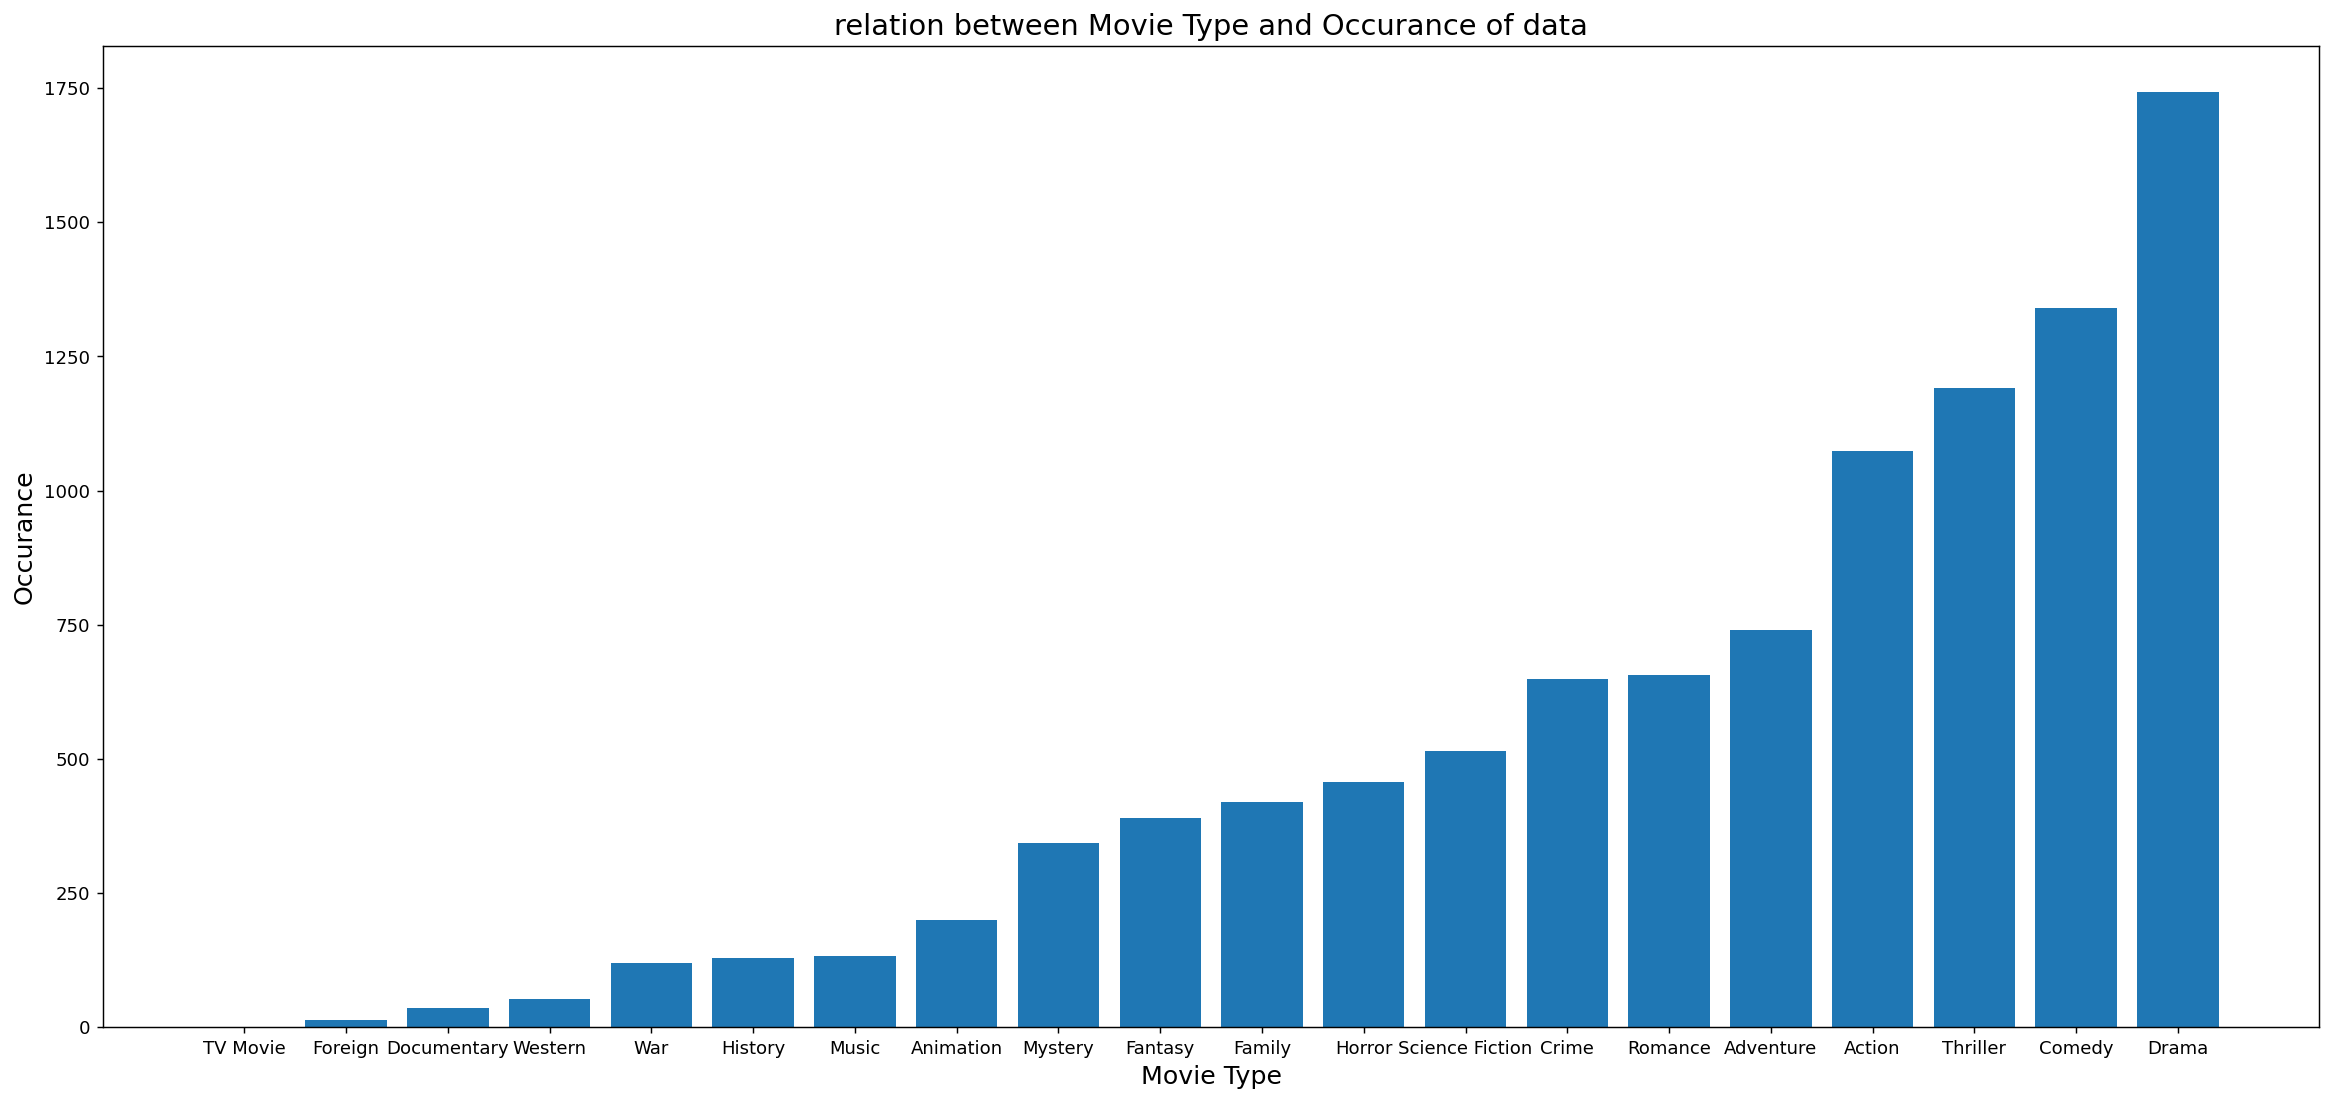

In [255]:
# plot bar diagram for movie geners
plot_relation_rate_dic(geners,'Movie Type','Occurance',"of data")

In [250]:
#Get Cast that  in great demand
cast=data_occurance_rate_due_profit(tmdb_df_cleaned['cast'])
dict(sorted(cast.items(), key=lambda item: item[1], reverse=True))
collections.Counter(dict(sorted(cast.items(), key=lambda item: item[1], reverse=True))).most_common(10)

[('Robert De Niro', 52),
 ('Bruce Willis', 46),
 ('Samuel L. Jackson', 43),
 ('Nicolas Cage', 43),
 ('Matt Damon', 36),
 ('Johnny Depp', 35),
 ('Brad Pitt', 34),
 ('Tom Hanks', 34),
 ('Harrison Ford', 33),
 ('Tom Cruise', 33)]

In [ ]:
#Get Director that  in great demand
director=data_occurance_rate_due_profit(tmdb_df_cleaned['director'])
dict(sorted(director.items(), key=lambda item: item[1], reverse=True))
collections.Counter(dict(sorted(director.items(), key=lambda item: item[1], reverse=True))).most_common(10)

### Research Question 4  (Movies profits investment increased or decreased every year? Is it a good investment?)

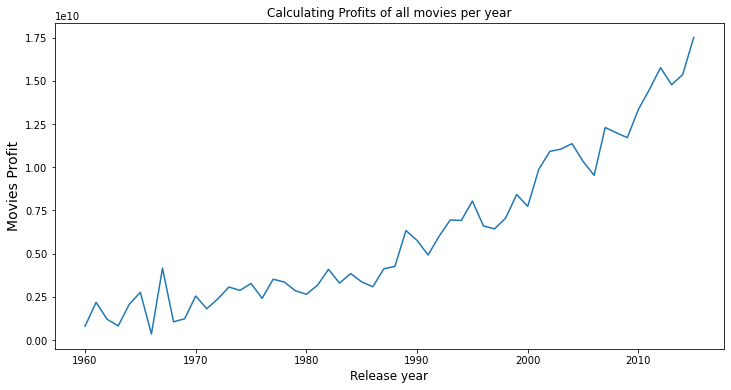

In [223]:
# plot the relation between movies profit per year 
profit_per_year=tmdb_df_cleaned.groupby('release_year')['profit'].sum()
plt.figure(figsize=(12,6))
plt.xlabel('Release year',fontsize = 12)
plt.ylabel('Movies Profit',fontsize = 14)
plt.title('Calculating Profits of all movies per year')
plt.plot(profit_per_year)

### As we can see the profits increases every year with excellent rate 

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!